In [41]:
#Import packages of interest
import csv
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
#from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import Axes3D
pd.options.display.max_columns=300
pd.options.display.max_rows=100
# Needed to scale PCA
from sklearn.preprocessing import StandardScaler

In [42]:
## TODO WRITE CODE AS CLASS IN SKLEARN STYLE WITH FIT/TRANSFORM

In [4]:
model1_psn3_10min = pd.read_csv('../../../data/anonymized/Model1/psn_3_twoyr_10min.csv')
# model1_psn3_10min = model1_psn3_10min.set_index('TIMESTAMP')

In [5]:
model1_psn3_10min['NPT'].head()

0    0.853322
1    0.890641
2    0.917015
3    0.884707
4    0.898949
Name: NPT, dtype: float64

In [6]:
plt.figure(figsize=(12,6))
test = model1_psn3_10min.iloc[:1000]
plt.plot(test['NPT'])

In [7]:
## test if data is already sorted by timestamp
##np.all(model1_psn3_10min.sort_values(by='TIMESTAMP').index == model1_psn3_10min.index)

In [8]:
# df.loc[260:270]

In [9]:
test = model1_psn3_10min.iloc[:1000]
df = test[['NPT','TIMESTAMP']]
df2 = pd.DataFrame(index = df.index.values[1:],columns = df.columns.values)


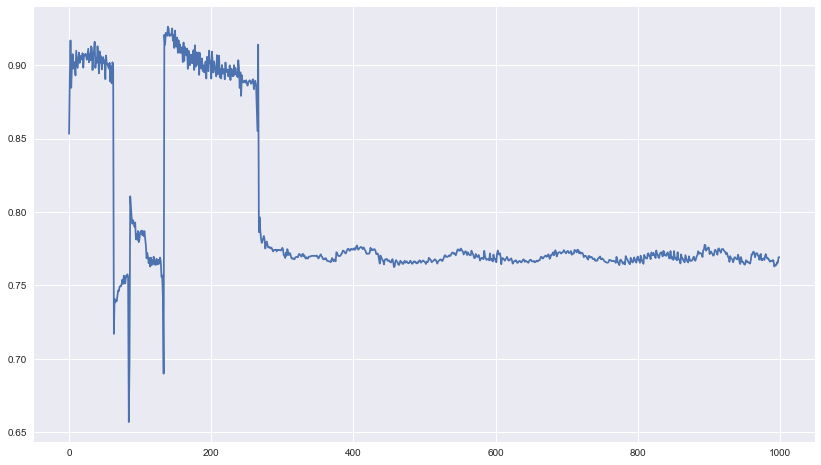

In [40]:
%matplotlib inline
plt.figure(figsize=(14,8))
plt.plot(test['NPT'])

In [49]:
def drop_recent_nans(fulltime, timestampcol):
    ## don't call this func. this gets called by timejoiner
    todrop=[]
    idxs = fulltime.index.values
    notimestamp = [col for col in fulltime.columns.values if col != timestampcol]
    for i,j in enumerate(fulltime.index.values):
        for k in notimestamp:
#             print(k)
            if np.isnan(fulltime.loc[idxs[i]][k]):
                if np.isnan(fulltime.loc[idxs[i+1]][k])==False:
                    if (fulltime.loc[idxs[i+1]][timestampcol] - fulltime.loc[idxs[i]][timestampcol])<pd.Timedelta('13 minutes'):
                        todrop.append(idxs[i])
                elif np.isnan(fulltime.loc[idxs[i-1]][k])==False:         
                    if (fulltime.loc[idxs[i]][timestampcol] - fulltime.loc[idxs[i-1]][timestampcol])<pd.Timedelta('13 minutes'):
                        todrop.append(idxs[i])
    dropped = fulltime.drop(todrop)
    return (dropped)

In [50]:
def timejoiner(df,timestampcol):
    aa = pd.DataFrame(columns=df.columns)
    aa[timestampcol]= pd.date_range(test.iloc[0][timestampcol],test.iloc[-1][timestampcol],freq=pd.Timedelta('10minutes'))
    aa[:]=np.nan ## set entire df to nan
#     aa.merge(df,how='left')
    df[timestampcol] = pd.to_datetime(df[timestampcol])
    fulltime = aa.append(df)#.sort_values(by='TIMESTAMP')
    fulltime = fulltime.sort_values(by=timestampcol).reset_index().drop('index',axis=1)

#     while np.any(np.isnan(fulltime[powercol])):
    fulltime = drop_recent_nans(fulltime,timestampcol)
    
    fulltime = fulltime.set_index(timestampcol)
    return (fulltime)
# aa.merge(df)

In [52]:
testfulldf = timejoiner(test,'TIMESTAMP')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyboardInterrupt: 

In [ ]:
testfulldf.head()

In [198]:
df = timejoiner(df,'TIMESTAMP','NPT')

/Users/Garrett/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [200]:
df.head(100)

,NPT
TIMESTAMP,
2015-12-16 10:10:00.000001024,0.853322
2015-12-16 10:19:59.999995648,0.890641
2015-12-16 10:30:00.000000000,0.917015
2015-12-16 10:40:00.000004352,0.884707
2015-12-16 10:49:59.999998976,0.898949
2015-12-16 11:00:00.000003328,0.907652
2015-12-16 11:09:59.999997696,0.897762
2015-12-16 11:20:00.000002304,0.902378
2015-12-16 11:29:59.999996672,0.899872


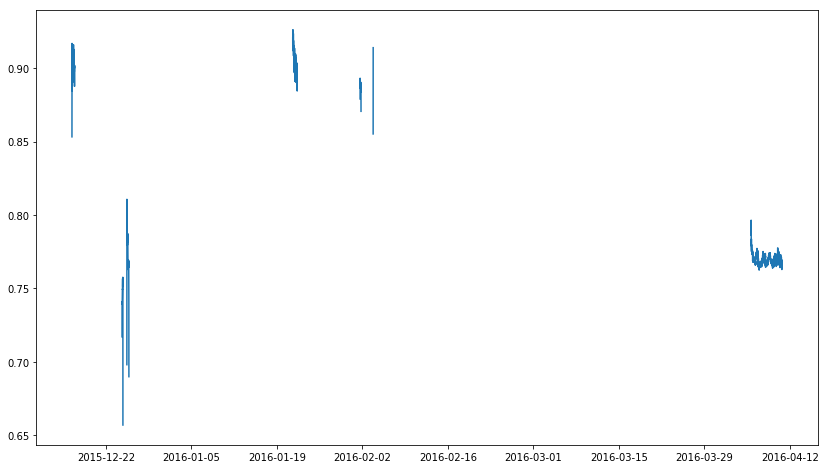

In [201]:
plt.figure(figsize=(14,8))
plt.plot(df['NPT'])

In [21]:
shifted = pd.Series(np.subtract(df['NPT'].values[1:],df['NPT'].values[:-1]),index=df.index.values[1:])
tomap = np.zeros(len(df2),dtype=int)  


In [34]:
maps = shifted[abs(shifted)>0.1]
pos = shifted[shifted>0.1]
negs = shifted[shifted<-0.1]

In [35]:
maps

63    -0.183561
86     0.112748
134    0.231034
267   -0.127781
dtype: float64

In [36]:
negs

63    -0.183561
267   -0.127781
dtype: float64

In [92]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

In [148]:
fulltime = aa.append(df)#.sort_values(by='TIMESTAMP')
fulltime = fulltime.sort_values(by='TIMESTAMP').reset_index().drop('index',axis=1)
# fulltime = fulltime.set_index('TIMESTAMP')

In [153]:

todrop=[]
idxs = fulltime.index.values
for i,j in enumerate(fulltime.index.values):
    if np.isnan(fulltime.loc[idxs[i]]['NPT']):
        if np.isnan(fulltime.loc[idxs[i+1]]['NPT'])==False:
            if (fulltime.loc[idxs[i+1]]['TIMESTAMP'] - fulltime.loc[idxs[i]]['TIMESTAMP'])<pd.Timedelta('13 minutes'):
                todrop.append(idxs[i])
fulltime = fulltime.drop(todrop)

In [154]:
fulltime.head(100)

,NPT,TIMESTAMP
1,0.853322,2015-12-16 10:10:00.000001024
2,0.890641,2015-12-16 10:19:59.999995648
4,0.917015,2015-12-16 10:30:00.000000000
7,0.884707,2015-12-16 10:40:00.000004352
8,0.898949,2015-12-16 10:49:59.999998976
11,0.907652,2015-12-16 11:00:00.000003328
12,0.897762,2015-12-16 11:09:59.999997696
15,0.902378,2015-12-16 11:20:00.000002304
16,0.899872,2015-12-16 11:29:59.999996672
18,0.893147,2015-12-16 11:40:00.000001024


In [167]:
np.any(np.isnan(fulltime['NPT']))

True

In [157]:
fulltime = fulltime.set_index('TIMESTAMP')

In [89]:
def gap_analysis(df,timestampcol,data_res):
    gap_summary = pd.DataFrame(columns=df.columns.values)
    
    if data_res in ['10min','10 min','10m']: ## one full day has 24*6 = 144 10-minute timestamps
        timerange = df.iloc[-1][timestampcol] -df.iloc[0][timestampcol]
        total_timestamps = timerange.days*144 + int(timerange.seconds/600)+1
        counts = df.count()/total_timestamps
        counts.name = 'Gap Summary'
        gap_summary = gap_summary.append(counts)
        percent_gap = len(df.index)/total_timestamps
        gap_summary.at['Gap Summary',timestampcol]=percent_gap
        return(gap_summary)
    
    elif data_res in ['1hr','1 hr','1 hour']: ## one full day has 24 1-hr timestamps
        timerange = df.iloc[-1][timestampcol] -df.iloc[0][timestampcol]
        total_timestamps = timerange.days*24 + int(timerange.seconds/3600)+1
        counts = df.count()/total_timestamps
        counts.name = 'Gap Summary'
        gap_summary = gap_summary.append(counts)
        percent_gap = len(df.index)/total_timestamps
        gap_summary.at['Gap Summary',timestampcol]=percent_gap
        return(gap_summary)
        
    

In [90]:
gap_analysis(model1_psn3_10min,timestampcol='TIMESTAMP',data_res='10min')

,PERF_C_PR1,C_C_DP1,F_C_DP1,F_C_DP2,F_C_DP3,F_C_DP4,F_C_DP5,LO_C_DT1,LO_C_DT2,LO_C_DT3,LO_C_DT4,LO_C_DT5,LO_C_DT6,C_DT5_1,C_DT5_10,C_DT5_11,C_DT5_12,C_DT5_2,C_DT5_3,C_DT5_4,C_DT5_5,C_DT5_6,C_DT5_7,C_DT5_8,C_DT5_9,C_DT7_1,C_DT7_2,C_DT7_3,C_DT7_4,PERF_C_PR2,LO_C_BRG1,PERF_C_P5,SC_C_PCT_E1,PE_C_POS_E1,PE_C_POS_E2,PE_C_POS_E3,F_C_POS_E1,LO_C_BRG2,C_C_T5_1,C_C_T5_2,C_C_T5_3,T2_S1,T5_S1,T7_S1,C_PCT1,PE_P1,F_P5,LO_T5,T7_7,F_P6,LO_T2,LO_P1,T5_3,PE_CMD2,PE_CMD3,PE_POS2,T7_1,F_P4,T7_8,T1_3,T1_2,T1_1,PE_FOR2,NPT,LO_T9,T5_8,T5_9,T5_7,T5_4,T5_5,T5_2,LO_T1,F_T1,NT5,PCD,SC_PCT2,V_D_4A,T7_6,F_CMD1,PE_FOR1,T7_3,PE_CMD1,PE_T1,T2_A,SUM_ENG_H,T5_11,T7_9,PE_POS1,LO_P2,V_G_5A,V_D_1B,V_D_1A,V_G_3A,V_G_3B,V_G_1A,V_G_1B,SUM_ESN,LO_T7,SC_DP1,SC_PCT1,F_P2,T2_1,T2_3,P5,V_D_6,SUM_ENG_ST,LO_T3,T5_1,F_P3,V_D_3B,V_D_3A,P7,V_G_6B,F_P7,V_D_7,V_D_5B,V_D_5A,NGP,V_G_7,F_P1,T2_2,V_D_2B,V_G_4B,V_G_4A,V_D_2A,P1,T5_6,F_POS1,V_G_2B,V_G_2A,LO_LVL1,PE_DP1,T7_4,T7_5,LO_T8,T7_2,C_DP1,T5_A,T5_10,T5_12,LO_T4,V_D_4B,TIMESTAMP
Gap Summary,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523,0.367523


In [91]:
test.head()

,PERF_C_PR1,C_C_DP1,F_C_DP1,F_C_DP2,F_C_DP3,F_C_DP4,F_C_DP5,LO_C_DT1,LO_C_DT2,LO_C_DT3,LO_C_DT4,LO_C_DT5,LO_C_DT6,C_DT5_1,C_DT5_10,C_DT5_11,C_DT5_12,C_DT5_2,C_DT5_3,C_DT5_4,C_DT5_5,C_DT5_6,C_DT5_7,C_DT5_8,C_DT5_9,C_DT7_1,C_DT7_2,C_DT7_3,C_DT7_4,PERF_C_PR2,LO_C_BRG1,PERF_C_P5,SC_C_PCT_E1,PE_C_POS_E1,PE_C_POS_E2,PE_C_POS_E3,F_C_POS_E1,LO_C_BRG2,C_C_T5_1,C_C_T5_2,C_C_T5_3,T2_S1,T5_S1,T7_S1,C_PCT1,PE_P1,F_P5,LO_T5,T7_7,F_P6,LO_T2,LO_P1,T5_3,PE_CMD2,PE_CMD3,PE_POS2,T7_1,F_P4,T7_8,T1_3,T1_2,T1_1,PE_FOR2,NPT,LO_T9,T5_8,T5_9,T5_7,T5_4,T5_5,T5_2,LO_T1,F_T1,NT5,PCD,SC_PCT2,V_D_4A,T7_6,F_CMD1,PE_FOR1,T7_3,PE_CMD1,PE_T1,T2_A,SUM_ENG_H,T5_11,T7_9,PE_POS1,LO_P2,V_G_5A,V_D_1B,V_D_1A,V_G_3A,V_G_3B,V_G_1A,V_G_1B,SUM_ESN,LO_T7,SC_DP1,SC_PCT1,F_P2,T2_1,T2_3,P5,V_D_6,SUM_ENG_ST,LO_T3,T5_1,F_P3,V_D_3B,V_D_3A,P7,V_G_6B,F_P7,V_D_7,V_D_5B,V_D_5A,NGP,V_G_7,F_P1,T2_2,V_D_2B,V_G_4B,V_G_4A,V_D_2A,P1,T5_6,F_POS1,V_G_2B,V_G_2A,LO_LVL1,PE_DP1,T7_4,T7_5,LO_T8,T7_2,C_DP1,T5_A,T5_10,T5_12,LO_T4,V_D_4B,TIMESTAMP
0,0.799404,0.000010,0.106854,0.079453,0.068092,0.022697,0.390494,0.535000,0.520001,0.477144,0.594999,0.425882,0.195294,0.068278,-0.108389,-0.051056,0.010944,0.039943,-0.084722,0.005611,0.003944,0.037944,0.018610,0.047277,0.011611,0.007500,0.025834,0.021167,0.009167,0.253563,0.165083,0.821486,-0.009333,-0.060301,-0.010840,-0.01920,0.01000,0.075701,0.870630,0.353334,0.124742,0.445007,0.212000,0.342000,0.070656,0.612501,0.573499,0.603478,0.840286,0.573257,0.6288,0.948948,0.853686,0.758292,0.240707,0.758915,0.851333,0.450824,0.844191,0.2940,0.2930,0.2920,0.425762,0.853322,0.5110,0.880086,0.872952,0.874352,0.871753,0.871419,0.878619,0.775000,0.725000,1.0,0.438568,0.820637,0.268181,0.848762,0.426907,0.116954,0.855238,0.579512,0.822588,0.733016,0.168533,0.860419,0.849190,0.592308,0.172400,-1.592500,0.236363,0.231818,-1.718000,-1.668000,-1.390833,-1.410500,57.0,0.641250,0.532840,-3.872533,0.734628,0.737048,0.733429,0.062885,-1.099738,63.0,0.6108,0.884286,0.451369,0.222727,0.218181,0.021506,-1.575000,25.908161,-0.649606,0.549999,0.472726,0.949943,-1.791667,0.733120,0.728571,0.327272,-1.574833,-1.573500,0.345454,0.914665,0.878219,0.426283,-1.546667,-1.568500,0.829142,0.516530,0.851809,0.845333,0.518261,0.856571,0.439905,0.870630,0.848952,0.872819,0.5056,0.254545,2015-12-16 10:10:00.000001024
1,0.854541,0.000011,0.082764,0.045395,0.079441,0.005672,0.355766,0.522500,0.557143,0.501905,0.537498,0.379999,0.250588,0.061111,-0.123889,-0.018222,0.005111,0.036111,-0.115889,0.033111,0.013111,0.052778,0.020111,0.038778,-0.002222,0.008833,0.021833,0.014167,0.010166,0.255103,0.137200,0.835372,0.017069,-0.060251,-0.006261,-0.02562,-0.07466,0.090476,0.870655,0.370000,0.157766,0.479996,0.222000,0.388000,0.070682,0.608014,0.614899,0.685652,0.824000,0.614839,0.7356,0.950093,0.847477,0.795764,0.187501,0.796124,0.838762,0.483418,0.834286,0.2965,0.2950,0.2935,0.519670,0.890641,0.6420,0.878410,0.870210,0.874677,0.877277,0.873277,0.877877,0.914375,0.790000,1.0,0.470844,0.856139,0.363636,0.837238,0.438042,0.137259,0.840286,0.598680,0.877177,0.757651,0.168533,0.867010,0.836238,0.611859,0.177775,-1.597333,0.290909,0.290909,-1.735500,-1.673167,-1.394500,-1.410667,57.0,0.783750,0.581683,-3.872533,0.732245,0.762095,0.757905,0.068654,-1.467192,63.0,0.7124,0.882877,0.484054,0.254545,0.281818,0.023159,-1.583333,25.831554,-0.566929,0.718180,0.577272,0.962629,-1.829500,0.731192,0.752952,0.363636,-1.598333,-1.598000,0.359090,0.914665,0.881210,0.442709,-1.555333,-1.571000,0.828443,0.567768,0.839143,0.833714,0.637826,0.842476,0.481571,0.870655,0.845877,0.871677,0.5876,0.295454,2015-12-16 10:19:59.999995648
2,0.885696,0.000011,0.111041,0.079445,0.056747,0.011349,0.336518,0.512500,0.544762,0.479047,0.514998,0.347059,0.243529,0.050888,-0.123111,-0.021778,0.014222,0.029222,-0.125111,0.026889,0.021556,0.051561,0.027561,0.032561,0.013894,0.007458,0.022125,0.010792,0.002791,0.255788,0.120676,0.842811,0.031799,-0.024349,-0.001401,-0.01490,0.02622,0.084678,0.869983,0.353343,0.159500,0.459998,0.212006,0.33600

In [96]:
test.at[1,'PERF_C_PR1'] = np.nan
test.at[2,'PERF_C_PR1'] = np.nan
test.at[3,'PERF_C_PR1'] = np.nan
test.at[4,'PERF_C_PR1'] = np.nan
test.at[3,'C_C_DP1'] = None
test.at[4,'C_C_DP1'] = None

In [97]:
gap_analysis(test,'TIMESTAMP','10min')

,PERF_C_PR1,C_C_DP1,F_C_DP1,F_C_DP2,F_C_DP3,F_C_DP4,F_C_DP5,LO_C_DT1,LO_C_DT2,LO_C_DT3,LO_C_DT4,LO_C_DT5,LO_C_DT6,C_DT5_1,C_DT5_10,C_DT5_11,C_DT5_12,C_DT5_2,C_DT5_3,C_DT5_4,C_DT5_5,C_DT5_6,C_DT5_7,C_DT5_8,C_DT5_9,C_DT7_1,C_DT7_2,C_DT7_3,C_DT7_4,PERF_C_PR2,LO_C_BRG1,PERF_C_P5,SC_C_PCT_E1,PE_C_POS_E1,PE_C_POS_E2,PE_C_POS_E3,F_C_POS_E1,LO_C_BRG2,C_C_T5_1,C_C_T5_2,C_C_T5_3,T2_S1,T5_S1,T7_S1,C_PCT1,PE_P1,F_P5,LO_T5,T7_7,F_P6,LO_T2,LO_P1,T5_3,PE_CMD2,PE_CMD3,PE_POS2,T7_1,F_P4,T7_8,T1_3,T1_2,T1_1,PE_FOR2,NPT,LO_T9,T5_8,T5_9,T5_7,T5_4,T5_5,T5_2,LO_T1,F_T1,NT5,PCD,SC_PCT2,V_D_4A,T7_6,F_CMD1,PE_FOR1,T7_3,PE_CMD1,PE_T1,T2_A,SUM_ENG_H,T5_11,T7_9,PE_POS1,LO_P2,V_G_5A,V_D_1B,V_D_1A,V_G_3A,V_G_3B,V_G_1A,V_G_1B,SUM_ESN,LO_T7,SC_DP1,SC_PCT1,F_P2,T2_1,T2_3,P5,V_D_6,SUM_ENG_ST,LO_T3,T5_1,F_P3,V_D_3B,V_D_3A,P7,V_G_6B,F_P7,V_D_7,V_D_5B,V_D_5A,NGP,V_G_7,F_P1,T2_2,V_D_2B,V_G_4B,V_G_4A,V_D_2A,P1,T5_6,F_POS1,V_G_2B,V_G_2A,LO_LVL1,PE_DP1,T7_4,T7_5,LO_T8,T7_2,C_DP1,T5_A,T5_10,T5_12,LO_T4,V_D_4B,TIMESTAMP
Gap Summary,0.059459,0.059579,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698,0.059698
